# Pyedra's Tutorial

This tutorial is intended to serve as a guide for using Pyedra to analyze asteroid phase curve data.

## Imports
----------------------------
The first thing we will do is import the necessary libraries. In general you will need the following:
- `pyedra` (*pyedra*) is the library that we present in this tutorial.
- `pandas` (*pandas*) this library will allow you to import your data as a dataframe.

_Note: In this tutorial we assume that you already have experience using these libraries._

In [126]:
import pyedra
import pandas as pd

## Upload the data
--------------------------------
The next thing we have to do is load our data. Pyedra should receive a dataframe with three columns: id (MPC number of the asteroid), alpha ($\alpha$, phase angle) and v (reduced magnitude in Johnson's V filter). You must respect the order and names of the columns as they have been mentioned. In this step we recommend the use of pandas:

`df = pd.read_csv('somefile.csv')`

For this tutorial we will use a preloaded data set offered by Pyedra.

In [5]:
df = pyedra.datasets.load_carbognani2019()

Here we show you the structure that your data file should have. Note that the file can contain information about many asteroids, which allows to obtain catalogs of the parameters of the phase function for large databases.

In [7]:
df

,id,alpha,v
0,85,0.89,7.62
1,85,1.18,7.67
2,85,2.07,7.82
3,85,5.11,8.01
4,85,16.24,8.48
5,85,17.49,8.53
6,85,21.24,8.66
7,208,0.64,9.20
8,208,1.01,9.24
9,208,1.74,9.39


## Fit your data
--------------------------
Pyedra's main objective is to fit a phase function model to our data. Currently the api offers three different models:

- `HG_fit` (H, G model): $V(\alpha)=H-2.5log_{10}[(1-G)\Phi_{1}(\alpha)+G\Phi_{2}(\alpha)]$

- `Shev_fit` (Shevchenko model): $V(1,\alpha)=V(1,0)-\frac{a}{1+\alpha}+b\cdot\alpha$

- `HG1G2_fit` (H, G$_1$, G$_2$ model): $V(\alpha) = H-2.5log_{10}[G_{1}\Phi_{1}(\alpha)+G_{2}\Phi_{2}(\alpha)+(1-G_{1}-G_{2})\Phi_{3}(\alpha)]$

We will now explain how to apply each of them. At the end of this tutorial you will notice that they all work in an analogous way and that their implementation is very simple.

--------------------------------------------
### HG_fit
---------------------------------------------
Let's assume that we want to fit the biparametric model H, G to our data set. What we will do is invoke Pyedra's `HG_fit` function:

In [8]:
HG = pyedra.HG_fit(df)

We have already created our catalog of H, G parameters for our data set. Let's see what it looks like.

In [9]:
HG

,id,H,error_H,G,error_G,R
0,85,7.492423,0.070257,0.043400,0.035114,0.991422
1,208,9.153433,0.217270,0.219822,0.097057,0.899388
2,236,8.059719,0.202373,0.104392,0.094382,0.914150
3,306,8.816185,0.122374,0.306459,0.048506,0.970628
4,313,8.860208,0.098102,0.170928,0.044624,0.982924
5,338,8.465495,0.087252,-0.121937,0.048183,0.992949
6,522,8.992164,0.063690,0.120200,0.028878,0.991757


**R** is the coefficient of determination of the fit


All pandas dataframe options are available. For example, you may be interested in knowing the mean H of your sample. To do so:

In [11]:
HG.H.mean()

8.54851801238607

Remeber that `HG.H` selects the H column.

In [14]:
HG.H

0    7.492423
1    9.153433
2    8.059719
3    8.816185
4    8.860208
5    8.465495
6    8.992164
Name: H, dtype: float64

The `PyedraFitDataFrame` can also be filtered, like a canonical pandas dataframe. Let's assume that we want to save the created catalog, but only for those asteroids whose id is less than t300. All we have to do is:

In [17]:
filtered = HG.model_df[HG.model_df['id'] < 300]
filtered

,id,H,error_H,G,error_G,R
0,85,7.492423,0.070257,0.043400,0.035114,0.991422
1,208,9.153433,0.217270,0.219822,0.097057,0.899388
2,236,8.059719,0.202373,0.104392,0.094382,0.914150


Finally we want to see our data plotted together with their respective fits. To do this we will use the `.plot` function provided by Pyedra. To obtain the graph with the adjustments of the phase function model we only have to pass to `.plot` the dataframe that contains our data in the following way:

<AxesSubplot:title={'center':'Phase curves'}, xlabel='Phase angle', ylabel='V'>

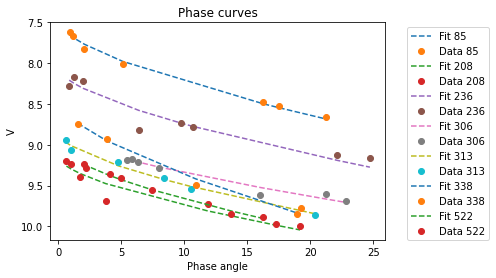

In [18]:
HG.plot(df = df)

If your database is very large and you want a clearer graph, or if you only want to see the fit of one of the asteroids you can filter your initial dataframe.

<AxesSubplot:title={'center':'Phase curves'}, xlabel='Phase angle', ylabel='V'>

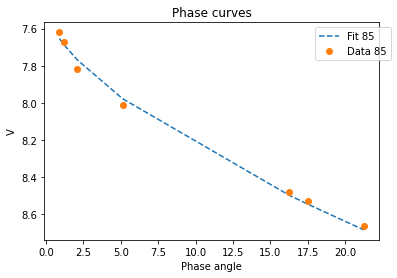

In [36]:
asteroid_85 = df[df['id'] == 85]
HG_85 = pyedra.HG_fit(asteroid_85)
HG_85.plot(df = asteroid_85)

All pandas plots are available if you want to use any of them. For example, we may want to visualize the histogram of one of the parameters:

<AxesSubplot:ylabel='Frequency'>

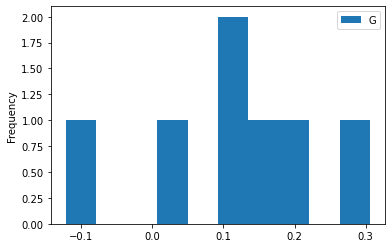

In [49]:
HG.plot(y = 'G', kind = 'hist')

Or we may want to find out if there is a correlation between parameters:

<AxesSubplot:xlabel='G', ylabel='H'>

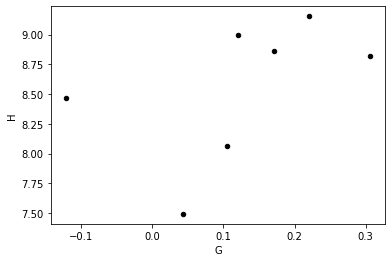

In [58]:
HG.plot(x= 'G', y = 'H', kind = 'scatter', marker = 'o', color = 'black')

Everything we have done in this section can be extended in an analogous way to the rest of the models, as we will see below.

----------------------------------------------
### HG1G2_fit
----------------------------------------------
Now we want to adjust the H, G$_1$, G$_2$ model to our data. Use the function `HG1G2_fit` in the following way.

In [61]:
HG1G2 = pyedra.HG1G2_fit(df)
HG1G2

,id,H12,error_H12,G1,error_G1,G2,error_G2,R
0,85,7.398776,0.162316,0.303790,0.081963,0.236331,0.062360,0.996285
1,208,8.904819,0.326344,-0.393842,0.320769,0.709746,0.190495,0.976405
2,236,7.901036,0.558052,0.043248,0.361217,0.413350,0.237267,0.934118
3,306,8.224509,1.238547,-0.041959,0.529741,0.367042,0.443392,0.968671
4,313,8.883195,0.347260,0.661550,0.161242,0.127482,0.154199,0.984322
5,338,8.450968,0.391477,0.691141,0.194887,-0.070232,0.173648,0.991939
6,522,9.046202,0.213791,0.705920,0.107933,0.088499,0.087300,0.992124


**R** is the coefficient of determination of the fit.

We can calculate, for example, the median of each of the columns:

In [62]:
HG1G2.median()

id           306.000000
H12            8.450968
error_H12      0.347260
G1             0.303790
error_G1       0.194887
G2             0.236331
error_G2       0.173648
R              0.984322
dtype: float64

Again, we can filter our catalog. We are keeping the best settings, that is, those whose R is greater than 0.98.

In [66]:
best_fits = HG1G2.model_df[HG1G2.model_df['R'] > 0.98]
best_fits

,id,H12,error_H12,G1,error_G1,G2,error_G2,R
0,85,7.398776,0.162316,0.303790,0.081963,0.236331,0.062360,0.996285
4,313,8.883195,0.347260,0.661550,0.161242,0.127482,0.154199,0.984322
5,338,8.450968,0.391477,0.691141,0.194887,-0.070232,0.173648,0.991939
6,522,9.046202,0.213791,0.705920,0.107933,0.088499,0.087300,0.992124


We will now look at the graphics. 

<AxesSubplot:title={'center':'Phase curves'}, xlabel='Phase angle', ylabel='V'>

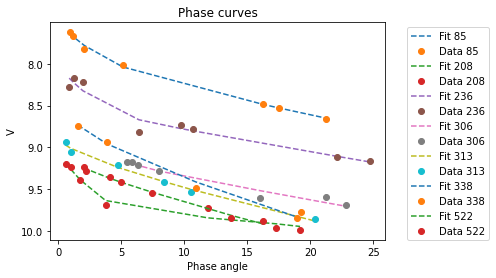

In [68]:
HG1G2.plot(df = df)

If we want to visualize the graph only of the asteroid (522):

<AxesSubplot:title={'center':'Phase curves'}, xlabel='Phase angle', ylabel='V'>

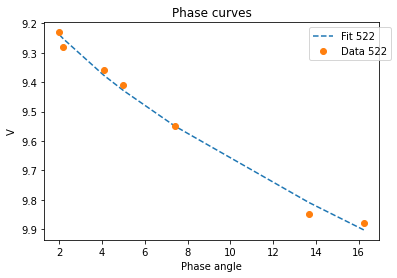

In [76]:
asteroid_522 = df[df['id'] == 522]
HG1G2_522 = pyedra.HG_fit(asteroid_522)
HG1G2_522.plot(df = asteroid_522)

To see the correlation between the parameters G$_1$ and G$_2$ we can use the "scatter" graph of pandas:

<AxesSubplot:xlabel='G1', ylabel='G2'>

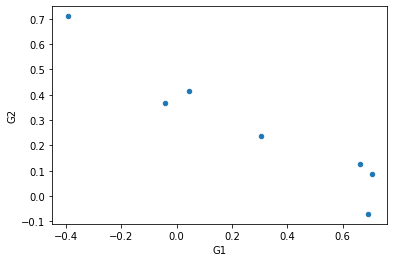

In [83]:
HG1G2.plot(x= 'G1', y = 'G2', kind = 'scatter')

--------------------
### Shev_fit
-------------------

If we want to adjust the Shevchenko model to our data, we must use `Shev_fit`.

In [129]:
Shev = pyedra.Shev_fit(df)
Shev

,id,V_lin,error_V_lin,b,error_b,c,error_c,R
0,85,7.957775,0.022576,0.696826,0.051010,0.034637,0.001184,0.999542
1,208,9.738767,0.146121,0.945126,0.300105,0.014448,0.008524,0.960483
2,236,8.626281,0.166623,0.916350,0.402758,0.023646,0.008515,0.932592
3,306,9.600553,0.275835,3.231009,1.549868,0.009097,0.010083,0.975662
4,313,9.132444,0.071010,0.297612,0.140332,0.037097,0.004712,0.988686
5,338,9.003280,0.216194,0.900765,0.623240,0.045328,0.011141,0.985846
6,522,9.292723,0.084461,0.392058,0.267625,0.039625,0.005236,0.989935


**R** is the coefficient of determination of the fit.

We can select a particular column and calculate, for example, its minimum:

In [130]:
Shev.V_lin

0    7.957775
1    9.738767
2    8.626281
3    9.600553
4    9.132444
5    9.003280
6    9.292723
Name: V_lin, dtype: float64

In [131]:
Shev.V_lin.min()

7.9577754899895226

And obviously we can graph the resulting fit:

<AxesSubplot:title={'center':'Phase curves'}, xlabel='Phase angle', ylabel='V'>

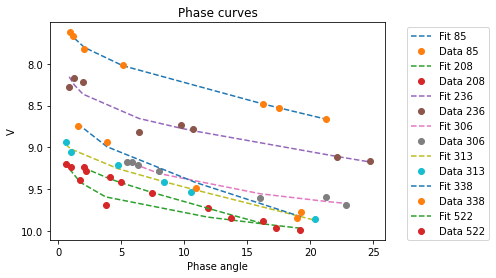

In [132]:
Shev.plot(df = df)

Selecting a subsample:

<AxesSubplot:title={'center':'Phase curves'}, xlabel='Phase angle', ylabel='V'>

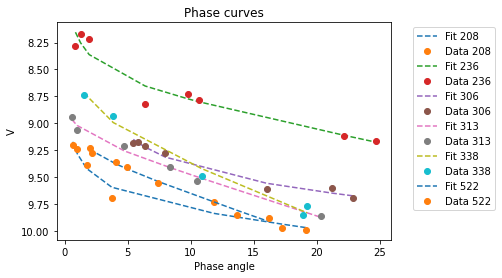

In [135]:
subsample = df[df['id'] > 100 ]
Shev_subsample = pyedra.Shev_fit(subsample)
Shev_subsample.plot(df = subsample)

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

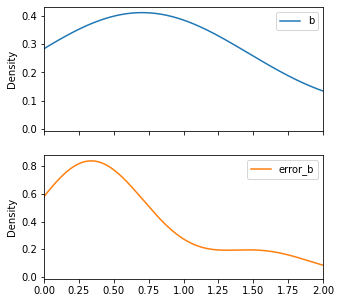

In [151]:
Shev_subsample.plot(y = ['b', 'error_b'], kind = 'density', subplots = True, figsize = (5,5), xlim = (0,2))
